In [3]:
import matplotlib.pyplot as plt
import IPython
%matplotlib inline

In [7]:
import speech as sp
import numpy as np
# Parameters 

p = 10 #Order of the all pole filter
frame_size = 400 # Window size
iterations = 10 # Number of iterations of the Wiener Filter

# Preparing the sample
y_clean, sr = sp.data.load('../samples/speech_male/arctic_a0001.wav')
# For now : choose the SNR (Db) and add corresponding noise to the signal
SNR = 20
y = sp.data.add_noise_from_file(y_clean,sr,'../samples/noise/crowd.wav',SNR)

s = sp.process.denoise(y,frame_size,p,iterations)

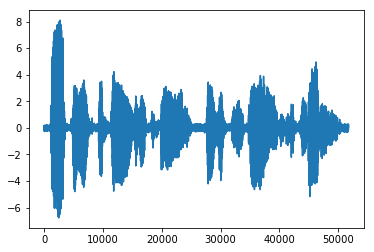

In [8]:
# Plot and play the noisy signal

plt.plot(y)
IPython.display.Audio(y,rate=sr)

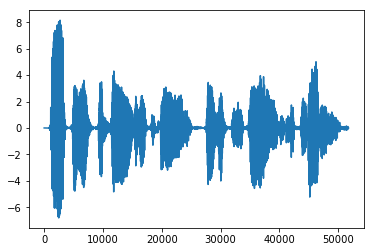

In [9]:
#Plot and play the denoised signal
plt.plot(s)
IPython.display.Audio(s,rate=sr)

In [15]:
np.min(np.abs(y_clean))
np.min(np.abs(s))

3.6751817314128111e-07

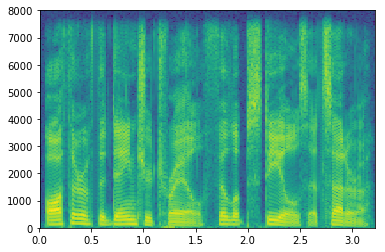

In [10]:
_,_,_, im_clean = plt.specgram(y_clean,NFFT = frame_size, Fs = sr)

/home/lcolbois/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7235: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


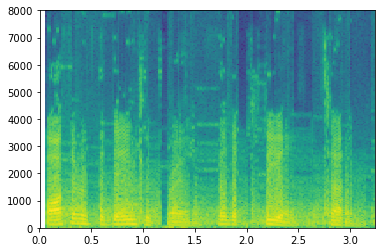

In [11]:
_,_,_, im_denoised = plt.specgram(s, NFFT = frame_size,Fs = sr)

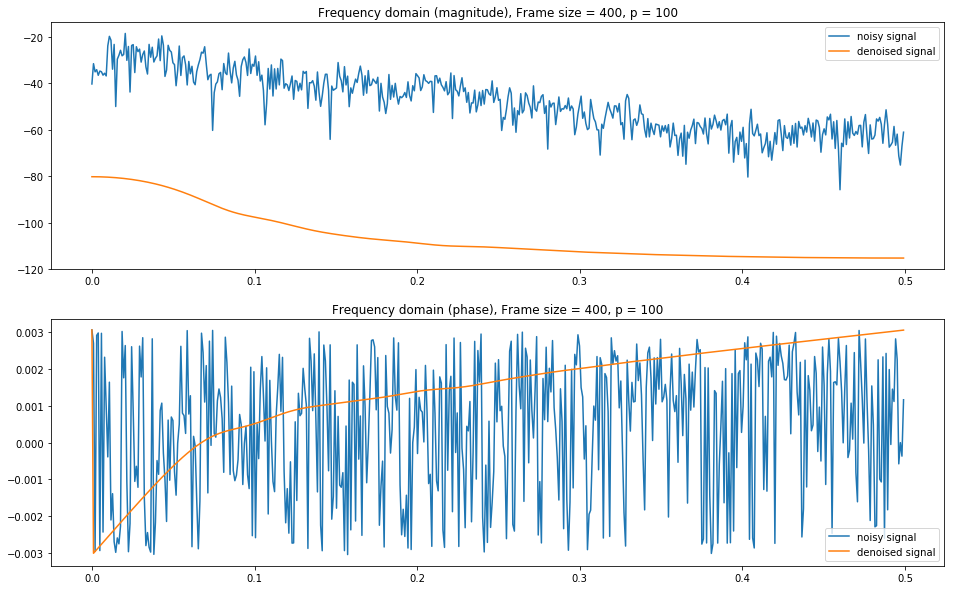

In [46]:
N = 1024
S = np.fft.fftshift(np.fft.fft(s, N))
Y = np.fft.fftshift(np.fft.fft(y, N))
freq = np.fft.fftshift(np.fft.fftfreq(N))
ind = [ind for ind, values in enumerate(freq) if values >= 0]

fig, axes = plt.subplots(2, 1, figsize=(16, 10))
# Plot spectrum (Magnitude)
axes[0].plot(freq[ind], 20*np.log10(np.abs(Y[ind])/N),label='noisy signal')
axes[0].plot(freq[ind], 20*np.log10(np.abs(S[ind])/N),label='denoised signal')
axes[0].legend()
axes[0].set_title('Frequency domain (magnitude), Frame size = {}, p = {}'.format(frame_size,p))

# Plot spectrum (Phase)
axes[1].plot(freq[ind], np.angle(Y[ind])/N,label='noisy signal')
axes[1].plot(freq[ind], np.angle(S[ind])/N,label='denoised signal')
axes[1].legend()
axes[1].set_title('Frequency domain (phase), Frame size = {}, p = {}'.format(frame_size,p))

plt.show()